# **PiPeline for Custom Dataset Training And Detection Using PaddleOCR**

In [ ]:
# prompt: nivida

!nvidia-smi


Fri Oct 11 17:46:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%cd /content/


/content


In [ ]:
# prompt: /content/sample_detect.zip unzip

!unzip /content/sample_detect.zip -d /content/


Archive:  /content/sample_detect.zip
   creating: /content/sample_detect/
   creating: /content/sample_detect/train/
  inflating: /content/sample_detect/train/OR 05AY 0251_56.jpg  
  inflating: /content/sample_detect/train/OR 05W 0031_33.jpg  
  inflating: /content/sample_detect/train/OR 06J 3768_58.jpg  
  inflating: /content/sample_detect/train/OR 06J 3768_91.jpg  
  inflating: /content/sample_detect/train/OR 07U 6640_144.jpg  
  inflating: /content/sample_detect/train/OR 07U 6640_158.jpg  
  inflating: /content/sample_detect/train/OR 07Z 7097_3.jpg  
  inflating: /content/sample_detect/train/OR 07Z 7097_61.jpg  
  inflating: /content/sample_detect/train/OR 09F 3377_173.jpg  
  inflating: /content/sample_detect/train/OR 09F 9141_147.jpg  
  inflating: /content/sample_detect/train/OR 09F 9141_183.jpg  
  inflating: /content/sample_detect/train/OR 09F 9922_130.jpg  
  inflating: /content/sample_detect/train/OR 09J 1715_122.jpg  
  inflating: /content/sample_detect/train/OR 09J 1715_175

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/

/content


# **Clone the Repo & Install the Required Dependencies**

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR
%cd PaddleOCR
!pip install -r requirements.txt

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 52355, done.
remote: Counting objects: 100% (1425/1425), done.
remote: Compressing objects: 100% (398/398), done.
remote: Total 52355 (delta 1105), reused 1313 (delta 1025), pack-reused 50930 (from 1)
Receiving objects: 100% (52355/52355), 390.51 MiB | 16.84 MiB/s, done.
Resolving deltas: 100% (36780/36780), done.
Updating files: 100% (2397/2397), done.
/content/PaddleOCR
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentation

In [ ]:
!pip install paddlepaddle-gpu   # for using  GPU
# !pip install paddlepaddle  # for using  CPU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


**Make sure that paddlepaddle installed properly using:**

In [ ]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


**If Getting libssl Error Run below command:**

In [ ]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

--2024-10-13 12:38:38--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.83, 91.189.91.81, 91.189.91.83, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  1008KB/s    in 1.1s    

2024-10-13 12:38:40 (1008 KB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’ saved [1128092/1128092]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog

# **Text Recognition PiPeline**






# **Dataset Preperation**

For Training Images we need two seperate folder-

**1.Train_images_dir**\
**2.Test_images_dir**

For the recognizer  Two Annotation files required **Train.txt** & **Test.txt** file would be:

**The format would be like below and tab '\t' seperated:**


image_path\tAnnotation\
image_path\tAnnotation


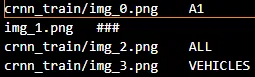

# **Prepare Recognizer Pipeline**


In [ ]:
%cd "/content/PaddleOCR"

/content/PaddleOCR


# **Download the pretrained Recognizer Model**

In [ ]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar

--2024-10-11 17:54:10--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204093440 (195M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’

en_PP-OCRv3_rec_tra 100%[===================>] 194.64M  13.8MB/s    in 30s     

2024-10-11 17:54:42 (6.55 MB/s) - ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’ saved [204093440/204093440]



In [ ]:
%cd /content/PaddleOCR/pretrain_models
!tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar

/content/PaddleOCR/pretrain_models


## **For Recognizer  modify the Below config file-** **(PaddleOCR/configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml)**

In [ ]:
'''
Global:
  debug: false
  use_gpu: false
  epoch_num: 50                                         ## Set the Number of Epochs  As per your Requirement
  log_smooth_window: 20
  print_batch_step: 10
  save_model_dir: ./output/v3_en_mobile
  save_epoch_step: 1
  eval_batch_step: [0, 5]                               ##  set the Eval step As per your Need
  cal_metric_during_train: true
  pretrained_model:                                       ## set   the pretrained Model path
  checkpoints:                                        ## Set the checkpoint path if you want to resume training from last epoch
  save_inference_dir:
  use_visualdl: false
  infer_img: doc/imgs_words/ch/word_1.jpg
  character_dict_path: ppocr/utils/en_dict.txt
  max_text_length: &max_text_length 25
  infer_mode: false
  use_space_char: true
  distributed: true
  save_res_path: ./output/rec/predicts_ppocrv3_en.txt


Train:
  dataset:
    name: SimpleDataSet
    data_dir:  /content/drive/MyDrive/Colab_Notebooks/Recog_dataset/                 ## Provide your Train_images Root folder
    ext_op_transform_idx: 1
    label_file_list:
    - /content/drive/MyDrive/Colab_Notebooks/Recog_dataset/cleaned_train.txt          ## Provide the  Train_Annotation File
    transforms:
    - DecodeImage:
        img_mode: BGR
        channel_first: false
    - RecConAug:
        prob: 0.5
        ext_data_num: 2
        image_shape: [48, 320, 3]
        max_text_length: *max_text_length
    - RecAug:
    - MultiLabelEncode:
    - RecResizeImg:
        image_shape: [3, 48, 320]
    - KeepKeys:
        keep_keys:
        - image
        - label_ctc
        - label_sar
        - length
        - valid_ratio
  loader:
    shuffle: true
    batch_size_per_card: 4
    drop_last: true
    num_workers: 1
Eval:
  dataset:
    name: SimpleDataSet
    data_dir: /content/drive/MyDrive/Colab_Notebooks/Recog_dataset/                             Provide your Test_images Root folder path
    label_file_list:
    - /content/drive/MyDrive/Colab_Notebooks/Recog_dataset/cleaned_test2.txt                     Provide your Test_Annotation File path
    transforms:
    - DecodeImage:
        img_mode: BGR
        channel_first: false
    - MultiLabelEncode:
    - RecResizeImg:
        image_shape: [3, 48, 320]
    - KeepKeys:
        keep_keys:
        - image
        - label_ctc
        - label_sar
        - length
        - valid_ratio
  loader:
    shuffle: false
    drop_last: false
    batch_size_per_card: 4
    num_workers: 1
'''

In [ ]:
%cd "/content/PaddleOCR"

# Start Training Using Custom Dataset

In [ ]:
!python3 /content/PaddleOCR/tools/train.py -c "/content/PaddleOCR/configs/rec/PP-OCRv3/ch_PP-OCRv3_rec.yml"

[2024/10/11 18:00:28] ppocr INFO: Architecture : 
[2024/10/11 18:00:28] ppocr INFO:     Backbone : 
[2024/10/11 18:00:28] ppocr INFO:         last_conv_stride : [1, 2]
[2024/10/11 18:00:28] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2024/10/11 18:00:28] ppocr INFO:         last_pool_type : avg
[2024/10/11 18:00:28] ppocr INFO:         name : MobileNetV1Enhance
[2024/10/11 18:00:28] ppocr INFO:         scale : 0.5
[2024/10/11 18:00:28] ppocr INFO:     Head : 
[2024/10/11 18:00:28] ppocr INFO:         head_list : 
[2024/10/11 18:00:28] ppocr INFO:             CTCHead : 
[2024/10/11 18:00:28] ppocr INFO:                 Head : 
[2024/10/11 18:00:28] ppocr INFO:                     fc_decay : 1e-05
[2024/10/11 18:00:28] ppocr INFO:                 Neck : 
[2024/10/11 18:00:28] ppocr INFO:                     depth : 2
[2024/10/11 18:00:28] ppocr INFO:                     dims : 64
[2024/10/11 18:00:28] ppocr INFO:                     hidden_dims : 120
[2024/10/11 18:00:28] ppocr I

**The trained model will be save in save_model_dir:**

output/rec/

├── best_accuracy.pdopt  
├── best_accuracy.pdparams  
├── best_accuracy.states  
├── config.yml  
├── iter_epoch_3.pdopt  
├── iter_epoch_3.pdparams  
├── iter_epoch_3.states  
├── latest.pdopt  
├── latest.pdparams  
├── latest.states  
└── train.log

# **Inference**
**Get predictions for an input image Using below script:**

In [ ]:
%cd /content/PaddleOCR

/content/PaddleOCR


In [ ]:
!python3 /content/PaddleOCR/tools/infer_rec.py -c "/content/PaddleOCR/configs/rec/PP-OCRv3/ch_PP-OCRv3_rec.yml" -o  Global.pretrained_model="/content/PaddleOCR/pretrain_models/output/rec_ppocr_v3/best_accuracy.pdparams" Global.infer_img="/content/sample_detect/val"

[2024/10/11 19:04:31] ppocr INFO: Architecture : 
[2024/10/11 19:04:31] ppocr INFO:     Backbone : 
[2024/10/11 19:04:31] ppocr INFO:         last_conv_stride : [1, 2]
[2024/10/11 19:04:31] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2024/10/11 19:04:31] ppocr INFO:         last_pool_type : avg
[2024/10/11 19:04:31] ppocr INFO:         name : MobileNetV1Enhance
[2024/10/11 19:04:31] ppocr INFO:         scale : 0.5
[2024/10/11 19:04:31] ppocr INFO:     Head : 
[2024/10/11 19:04:31] ppocr INFO:         head_list : 
[2024/10/11 19:04:31] ppocr INFO:             CTCHead : 
[2024/10/11 19:04:31] ppocr INFO:                 Head : 
[2024/10/11 19:04:31] ppocr INFO:                     fc_decay : 1e-05
[2024/10/11 19:04:31] ppocr INFO:                 Neck : 
[2024/10/11 19:04:31] ppocr INFO:                     depth : 2
[2024/10/11 19:04:31] ppocr INFO:                     dims : 64
[2024/10/11 19:04:31] ppocr INFO:                     hidden_dims : 120
[2024/10/11 19:04:31] ppocr I

The configuration file used for prediction must be same that Used with the training

# **Model export and prediction**

# Conversion of weights:

**After Training the weights we need to convert or export them before we can run inference.**

The inference model ( paddle.jit.savesaved model) is generally a model training, a solidified model that saves the model structure and model parameters in a file, and is mostly used to predict deployment scenarios. The model saved during the training process is the checkpoints model, and only the parameters of the model are saved, which are mostly used for recovery training. Compared with the checkpoints model, the inference model will additionally save the structural information of the model, which has superior performance in predicting deployment and accelerating reasoning, is flexible and convenient, and is suitable for actual system integration.

The method of converting the recognition model to the inference model is the same as the detection method, as follows:

In [ ]:
# -c 后面设置训练算法的yml配置文件
# -o 配置可选参数
# Global.pretrained_model 参数设置待转换的训练模型地址，不用添加文件后缀 .pdmodel，.pdopt或.pdparams。
# Global.save_inference_dir参数设置转换的模型将保存的地址。

!python3 tools/export_model.py -c "/content/PaddleOCR/configs/rec/PP-OCRv3/ch_PP-OCRv3_rec.yml" -o Global.pretrained_model="/content/PaddleOCR/pretrain_models/output/rec_ppocr_v3/best_accuracy.pdparams"  Global.save_inference_dir=./recg/en_PP-OCRv3_rec


W1011 19:07:48.004241 43652 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 11.8
W1011 19:07:48.005254 43652 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
[2024/10/11 19:07:48] ppocr INFO: load pretrain successful from /content/PaddleOCR/pretrain_models/output/rec_ppocr_v3/best_accuracy
I1011 19:07:50.600113 43652 program_interpreter.cc:212] New Executor is Running.
[2024/10/11 19:07:50] ppocr INFO: inference model is saved to ./recg/en_PP-OCRv3_rec/inference
[2024/10/11 19:07:50] ppocr INFO: Export inference config file to ./recg/en_PP-OCRv3_rec/inference.yml


In [ ]:
# prompt: /content/PaddleOCR/recg dowload

from google.colab import files
!zip -r /content/recg.zip /content/PaddleOCR/recg
files.download('/content/recg.zip')


  adding: content/PaddleOCR/recg/ (stored 0%)
  adding: content/PaddleOCR/recg/en_PP-OCRv3_rec/ (stored 0%)
  adding: content/PaddleOCR/recg/en_PP-OCRv3_rec/inference.pdiparams.info (deflated 81%)
  adding: content/PaddleOCR/recg/en_PP-OCRv3_rec/inference.pdiparams (deflated 10%)
  adding: content/PaddleOCR/recg/en_PP-OCRv3_rec/inference.pdmodel (deflated 90%)
  adding: content/PaddleOCR/recg/en_PP-OCRv3_rec/inference.yml (deflated 58%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**After the conversion is successful, there are three files in the directory:**

inference/en_PP-OCRv3_rec/

    ├── inference.pdiparams         # 识别inference模型的参数文件
    ├── inference.pdiparams.info    # 识别inference模型的参数信息，可忽略
    └── inference.pdmodel           # 识别inference模型的program文件 bold text



# Convert ONNX 

# requirements Download

In [ ]:
!pip install paddle2onnx
!pip install paddlepaddle paddleocr

In [ ]:
!paddle2onnx --model_dir "/content/PaddleOCR/en_PP-OCRv3_rec" --model_filename "/content/PaddleOCR/en_PP-OCRv3_rec/inference.pdmodel" --params_filename "/content/PaddleOCR/en_PP-OCRv3_rec/inference.pdiparams" --save_file "/content/PaddleOCR/en_PP-OCRv3_rec/model.onnx" --opset_version 16 --enable_onnx_checker True
